#Jonathan Halverson
#Thursday, March 3, 2016
#Linear Regression in StatsModels

###Create artificial data: 

In [169]:
import numpy as np
np.random.seed(0)

def f(x, m=2.0, b=6.0):
    err = np.random.normal(loc=0.0, scale=1.0, size=x.size)
    return m * x + b + err

x = np.linspace(0.0, 5.0)
y = f(x)

### Plot the data using Matplotlib:

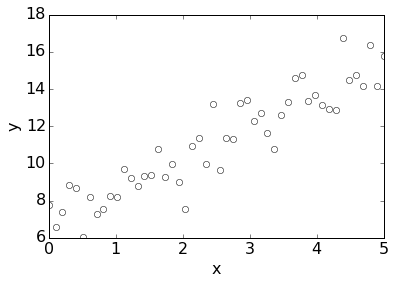

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 16

line = plt.plot(x, y, 'wo')
plt.xlabel('x')
plt.ylabel('y')

###Compute the ordinary least squares using StatsModels: 

In [171]:
import statsmodels.api as sm
X = sm.add_constant(x)
regmodel = sm.OLS(y, X, missing='none')
result = regmodel.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     280.7
Date:                Sat, 05 Mar 2016   Prob (F-statistic):           1.09e-21
Time:                        13:09:17   Log-Likelihood:                -73.192
No. Observations:                  50   AIC:                             150.4
Df Residuals:                      48   BIC:                             154.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.8464      0.297     23.016      0.0

### The p-values indicate that the slope and intercept are non-zero:

###Compute the slope and intercept using calculus on the sum of the squares: $dy/d\alpha=0, dy/d\beta = 0$: 

In [185]:
sumx = sum(x)
sumy = sum(y)
sumxx = sum(x*x)
sumxy = sum(x*y)
slope = (sumy - x.size * sumxy / sumx) / (sumx - x.size * sumxx / sumx)
intercept = (sumxy - slope * sumxx) / sumx
print slope, intercept

1.7176755014 6.84637051881


###Plot the data and best-fit line: 

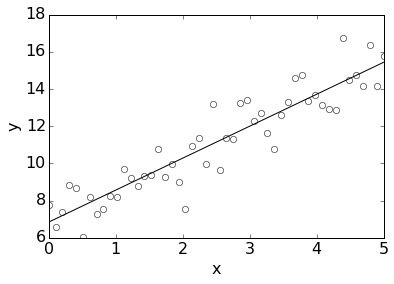

In [172]:
intercept = result.params[0]
slope = result.params[1]
lines = plt.plot(x, y, 'wo', x, slope * x + intercept, 'k-')
plt.xlabel('x')
plt.ylabel('y')

###Let's compute the correlation and R-squared values by hand. The $R^2$ of a linear model describes the amount of variation in the response that is explained by the least squares line. Essentially we're comparing the raw variance in the y values to that of the residuals. If a perfect fit the $R^2=1$ since the variance is the residuals would be zero. It's like instead of using the raw mean, if one uses the predicted value of y for each x then the variance is reduced.

### The correlation, or the extent to which two variables have a linear relationship with each other, can be computed as

In [173]:
R = sum((x - x.mean()) * (y - y.mean())) / y.std(ddof=1) / x.std(ddof=1) / (x.size - 1.0)
print R

0.924106548329


###In Python, this may be calculated as 

In [174]:
from scipy.stats import pearsonr
R, p_value = pearsonr(x, y)
print R, p_value

0.924106548329 1.09210506482e-21


###The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

###The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so. 

###The R-squared value is then 

In [175]:
R**2

0.85397291266520847

###The R-squared value can also be computed as

In [176]:
(y.var() - result.resid.var()) / y.var()

0.85397291266520858

###From the OLS results we find: 

In [177]:
result.rsquared

0.85397291266520869

### The adjusted R-squared value is given by $R^2_{adj}=1-\frac{\sigma^2_e}{\sigma^2_y}\frac{n-1}{n-k-1}$, where k and n are the number of features and number of observations, respectively.

In [178]:
R2_adj = 1.0 - (result.resid.var() / y.var()) * (y.size - 1.0) / (y.size - 1 - 1.0)
print R2_adj

0.850930681679


#Repeat calculation using R-style formula

### Load data into a DataFrame

In [179]:
import pandas as pd
xy = pd.DataFrame({'x':x, 'y':y})
xy.head()

,x,y
0,0.000000,7.764052
1,0.102041,6.604239
2,0.204082,7.386901
3,0.306122,8.853138
4,0.408163,8.683885


### Use Patsy to enter R-style formulas

In [184]:
import statsmodels.formula.api as smf
result = smf.ols(formula='y ~ x', data=xy).fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     280.7
Date:                Sat, 05 Mar 2016   Prob (F-statistic):           1.09e-21
Time:                        13:12:15   Log-Likelihood:                -73.192
No. Observations:                  50   AIC:                             150.4
Df Residuals:                      48   BIC:                             154.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.8464      0.297     23.016      0.0

###The same answer is obtained. 